# SQLAlchemy Homework - Surfs Up!

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

In [97]:
# Import dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import sqlalchemy
# From dependencies 
from sqlalchemy import create_engine, func, inspect, Table, Column, Integer, String, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql.expression import exists
from sqlalchemy.orm import Session

# Step 1 - Climate Analysis and Exploration

Use SQLAlchemy create_engine to connect to your sqlite database.

In [107]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
print(engine)

Engine(sqlite:///Resources/hawaii.sqlite)


In [84]:
# Reflect your tables into classes and save a reference to station and measurement
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()



['measurement', 'station']

In [109]:
# Saver into variable
measurement = Base.classes.measurement
station = Base.classes.station

# Create connection
session = Session(engine)

## Precipitation Analysis

In [92]:
# Inspect tables of new variables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [93]:
# Getting Columns Name
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [113]:
# Design a query to retrieve the last 12 months of precipitation data.
engine.execute("SELECT date, prcp FROM measurement").fetchall()
session.query(func.count(measurement.date)).all()
current_year = session.query(func.max(measurement.date)).all()
last_year = session.query(func.


[('2017-08-23')]

In [126]:
# Select only the date and prcp values.
dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
dates
                        
# group_by(Measurement.date).all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [128]:
# Sort the DataFrame values by date
dates_df = pd.DataFrame(dates, columns=['date','prcp'])

dates_df.sort_values(by='date',ascending= True) 
dates_df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
dates_df.set_index('date')
dates_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
361,2017-08-19,0.00
362,2017-08-20,0.00
363,2017-08-21,0.00
364,2017-08-22,0.00


Text(0.5, 1.0, 'Hawaii´s precipitation 2016-2017')

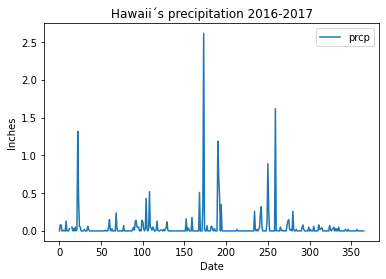

In [133]:
# Plot the results using the DataFrame plot method.
dates_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Hawaii´s precipitation 2016-2017')

In [135]:
#Use Pandas to print the summary statistics for the precipitation data.
dates_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


## Station Analysis


In [153]:
# Inspect tables of new variables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [208]:
#List the stations and observation counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
#Create Dataframe
active_stations_df = pd.DataFrame(active_stations, columns=['station','name'])
active_stations_df

,station,name
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [233]:
# Design a query to calculate the total number of stations.
len(active_stations_df)

9

In [232]:
# Design a query to find the most active stations.
active_stations_temps
len(active_stations_temps)

352

In [185]:
# Which station has the highest number of observations
most_observation = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
most_observation[0] 

('USC00519281', 2772)

In [246]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).


active_stations_temps= session.query(Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                       filter(Measurement.station == "USC00519281").all()

all_temps= [z[0] for z in active_stations_temps]
all_temps

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

<Figure size 432x288 with 0 Axes>

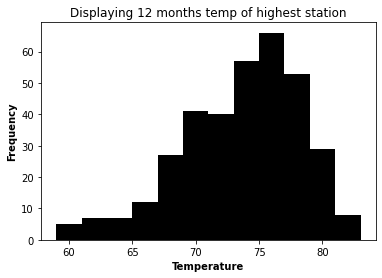

<Figure size 432x288 with 0 Axes>

In [247]:
#Plot the results as a histogram with bins=12.
plt.hist(all_temps, bins=12, color="black")
plt.title("Displaying 12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
plt.figure(2)

# Step 2 - Climate App

Design a Flask API based on the queries that you have just developed.

## Routes 

In [248]:
# import Dependencies
import numpy as np
import sqlalchemy

from sqlalchemy import create_engine, func ,inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from flask import Flask, jsonify


In [249]:
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [250]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [251]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [252]:
# Flask Setup
#################################################
app = Flask(__name__)

In [254]:
@app.route("/")
def home():
    return("/api/v1.0/precipitation<br/>"
    "/api/v1.0/stations<br/>"
    "/api/v1.0/tobs<br/>"
    "/api/v1.0/2017-01-01<br/>")


AssertionError: View function mapping is overwriting an existing endpoint function: home